<a href="https://colab.research.google.com/github/sharinair14/ML-Projects/blob/main/Fake_Currency_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f=open('/content/Fake-currency-detection.txt','r')
reader=csv.reader(f)

**Reading dataset from the text file**

In [3]:
data=pd.read_csv('/content/Fake-currency-detection.txt',header=None)

In [4]:
data.columns=['variance','skewness','kurtosis','entropy','output']

In [5]:
data.head()

,variance,skewness,kurtosis,entropy,output
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
data.tail()

,variance,skewness,kurtosis,entropy,output
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   output    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
data.shape

(1372, 5)

In [9]:
data.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
output      0
dtype: int64

No null values present in the dataset

In [10]:
data.describe()

,variance,skewness,kurtosis,entropy,output
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


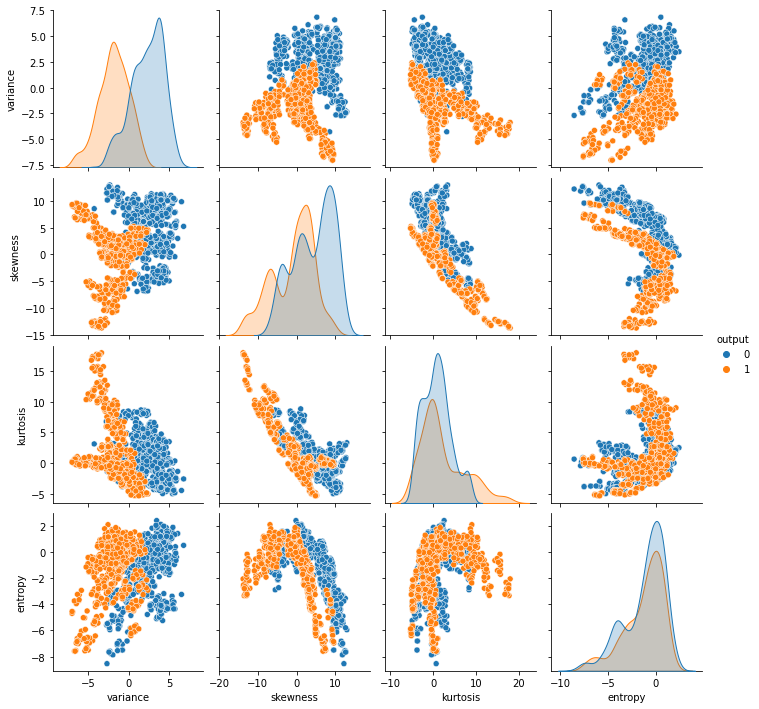

In [11]:
sns.pairplot(data,kind='scatter',hue='output')

Observations in the above plot:

*   Some of the features are linearly correlated and some are non-linear.
*   Some features have easily distinguishable classes.

Text(1, 623, '610')

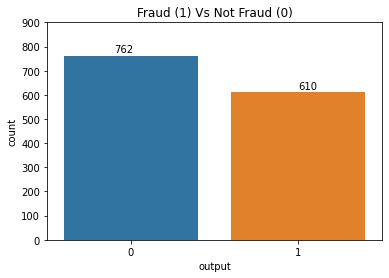

In [12]:
plt.title('Fraud (1) Vs Not Fraud (0)')
sns.countplot(x='output',data=data)
plt.ylim(0,900)
plt.annotate(s=data['output'].value_counts()[0],xy=(-0.1,13+data['output'].value_counts()[0]))
plt.annotate(s=data['output'].value_counts()[1],xy=(1,13+data['output'].value_counts()[1]))

In [13]:
data['output'].value_counts()

0    762
1    610
Name: output, dtype: int64

Clearly, it is an imbalanced dataset.This is a binary classification problem.So the target class should have an equal proportion.

To solve imbalance problem, we have two approches:


*   Random oversampling
*   Random undersampling

In oversampling, we replicate the minority target class so that it comes to close to majority class.
In undersampling, we eliminate the majority target class to make it equal to minority class.

In this dataset , I am gonna delete some of the datapoints from majority class to make it in equal proportion.

In [14]:
dat_todelete=data['output'].value_counts()[0] - data['output'].value_counts()[1]

In [15]:
dat_todelete

152

In [16]:
data=data.sample(frac=1,random_state=101).sort_values(by='output')

In [17]:
data=data[dat_todelete:]

In [18]:
data['output'].value_counts()

1    610
0    610
Name: output, dtype: int64

In [19]:
x=data.drop('output',axis=1)
y=data['output']

**Splitting the data into train & test set**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [22]:
x_train.shape

(976, 4)

**Standardize the data**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Build the model**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression(random_state=101)
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)

**Evaluating the model**

In [28]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [29]:
print('Accuracy is',accuracy_score(y_test,ypred))
print('Precision is',precision_score(y_test,ypred))
print('Recall is',recall_score(y_test,ypred))
print('Confusion Matrix is',confusion_matrix(y_test,ypred))

Accuracy is 0.9836065573770492
Precision is 0.967741935483871
Recall is 1.0
Confusion Matrix is [[120   4]
 [  0 120]]


**Testing the model with some new random test data**

In [38]:
#New test data
new=np.array([4.5, -8.1, 2.4, 1.4],ndmin=2)

In [39]:
#check no. of dimension
new.ndim

2

In [40]:
#checking the predicted probability of new data
lr.predict_proba(sc.transform(new))

array([[0.63292388, 0.36707612]])

In [42]:
#checking the new data is real or fake
lr.predict(sc.transform(new))

array([0])

Our model detects the new test data is a real currency.